In [51]:
# required libraries
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load datasets

In [6]:
# 1. electricty demand datasets
demand = pd.read_csv("totaldemand_nsw.csv/totaldemand_nsw.csv")
print(demand.head())
print(demand.tail())
print(demand.dtypes)

        DATETIME  TOTALDEMAND REGIONID
0  1/1/2010 0:00      8038.00     NSW1
1  1/1/2010 0:30      7809.31     NSW1
2  1/1/2010 1:00      7483.69     NSW1
3  1/1/2010 1:30      7117.23     NSW1
4  1/1/2010 2:00      6812.03     NSW1
               DATETIME  TOTALDEMAND REGIONID
196508  17/3/2021 22:00      7419.77     NSW1
196509  17/3/2021 22:30      7417.91     NSW1
196510  17/3/2021 23:00      7287.32     NSW1
196511  17/3/2021 23:30      7172.39     NSW1
196512   18/3/2021 0:00      7094.51     NSW1
DATETIME        object
TOTALDEMAND    float64
REGIONID        object
dtype: object


In [7]:
# 2. Temperature dataset
temp = pd.read_csv("temperature_nsw.csv/temperature_nsw.csv")
print(temp.head())
print(temp.tail())
print(temp.dtypes)

    LOCATION       DATETIME  TEMPERATURE
0  Bankstown  1/1/2010 0:00         23.1
1  Bankstown  1/1/2010 0:01         23.1
2  Bankstown  1/1/2010 0:30         22.9
3  Bankstown  1/1/2010 0:50         22.7
4  Bankstown  1/1/2010 1:00         22.6
         LOCATION         DATETIME  TEMPERATURE
220321  Bankstown  17/3/2021 23:00         19.1
220322  Bankstown  17/3/2021 23:20         19.0
220323  Bankstown  17/3/2021 23:30         18.8
220324  Bankstown  17/3/2021 23:34         18.8
220325  Bankstown   18/3/2021 0:00         18.6
LOCATION        object
DATETIME        object
TEMPERATURE    float64
dtype: object


In [8]:
# 3. Forecasted demand
# reconstructing the zip file from parts
parts = ["forecastdemand_nsw.csv.zip.partaa",
         "forecastdemand_nsw.csv.zip.partab"]  
with open("forecastdemand_nsw.zip", "wb") as outfile:
    for fname in parts:
        with open(fname, "rb") as infile:
            outfile.write(infile.read())

# now extract the reconstructed zip
with zipfile.ZipFile("forecastdemand_nsw.zip", "r") as zf:
    zf.extractall("forecastdemand_nsw")  #extracts files into a folder

forecast= pd.read_csv("forecastdemand_nsw/forecastdemand_nsw.csv")
print(forecast.head())
print(forecast.tail())
print(forecast.dtypes)

   PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND          LASTCHANGED  \
0        2009123018     NSW1        71         7832.04  2009-12-30 12:31:49   
1        2009123019     NSW1        70         7832.04  2009-12-30 13:01:43   
2        2009123020     NSW1        69         7832.03  2009-12-30 13:31:36   
3        2009123021     NSW1        68         7832.03  2009-12-30 14:01:44   
4        2009123022     NSW1        67         7830.96  2009-12-30 14:31:35   

              DATETIME  
0  2010-01-01 00:00:00  
1  2010-01-01 00:00:00  
2  2010-01-01 00:00:00  
3  2010-01-01 00:00:00  
4  2010-01-01 00:00:00  
          PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND  \
10906014        2021031736     NSW1         5         7028.45   
10906015        2021031737     NSW1         4         7041.65   
10906016        2021031738     NSW1         3         7087.60   
10906017        2021031739     NSW1         2         7087.28   
10906018        2021031740     NSW1         1     

## 2. Data processing and exploration

##### First converting the half-hourly dataset into daily basis based on mean values.

         DATE  daily_demand
0  2010-01-01       7801.35
1  2010-01-02       8017.46
2  2010-01-03       7399.90
3  2010-01-04       8241.72
4  2010-01-05       8827.81
            DATE  daily_demand
4090  2021-03-14       7092.58
4091  2021-03-15       6930.62
4092  2021-03-16       7330.38
4093  2021-03-17       7428.19
4094  2021-03-18       7094.51
DATE             object
daily_demand    float64
dtype: object


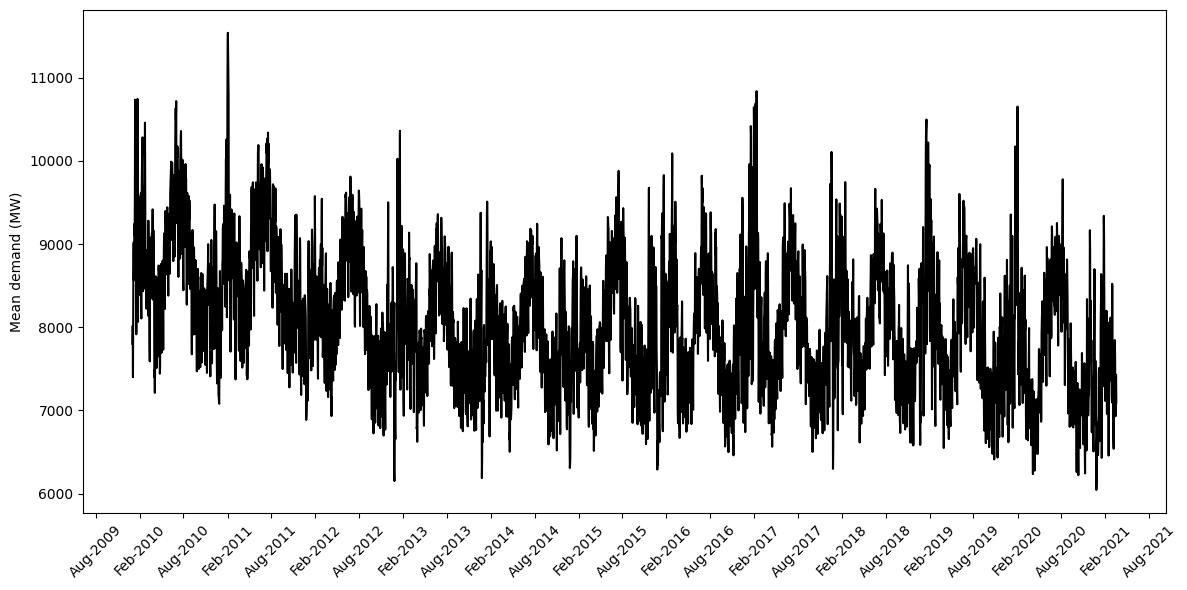

In [41]:
# Transforming half-hourly electricity demand into daily 
demand['DATETIME'] = pd.to_datetime(demand['DATETIME'], dayfirst=True)
demand['DATE'] = demand['DATETIME'].dt.date
daily_demand = demand.groupby('DATE')['TOTALDEMAND'].mean().reset_index().round(2)
daily_demand = daily_demand.rename(columns={"TOTALDEMAND": "daily_demand"})
print(daily_demand.head())
print(daily_demand.tail())
print(daily_demand.dtypes)

# Daily mean electricity demand (NSW) plot
plt.figure(figsize=(12,6))
plt.plot(daily_demand['DATE'], daily_demand['daily_demand'], color='black')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=6))  #for every 6 months
plt.ylabel("Mean demand (MW)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    LOCATION        DATE  daily_temperature
0  Bankstown  2010-01-01          25.094000
1  Bankstown  2010-01-02          24.765385
2  Bankstown  2010-01-03          19.429825
3  Bankstown  2010-01-04          20.625926
4  Bankstown  2010-01-05          22.660417
       LOCATION        DATE  daily_temperature
4087  Bankstown  2021-03-14          18.042254
4088  Bankstown  2021-03-15          17.116667
4089  Bankstown  2021-03-16          18.264516
4090  Bankstown  2021-03-17          19.405263
4091  Bankstown  2021-03-18          18.600000
LOCATION              object
DATE                  object
daily_temperature    float64
dtype: object


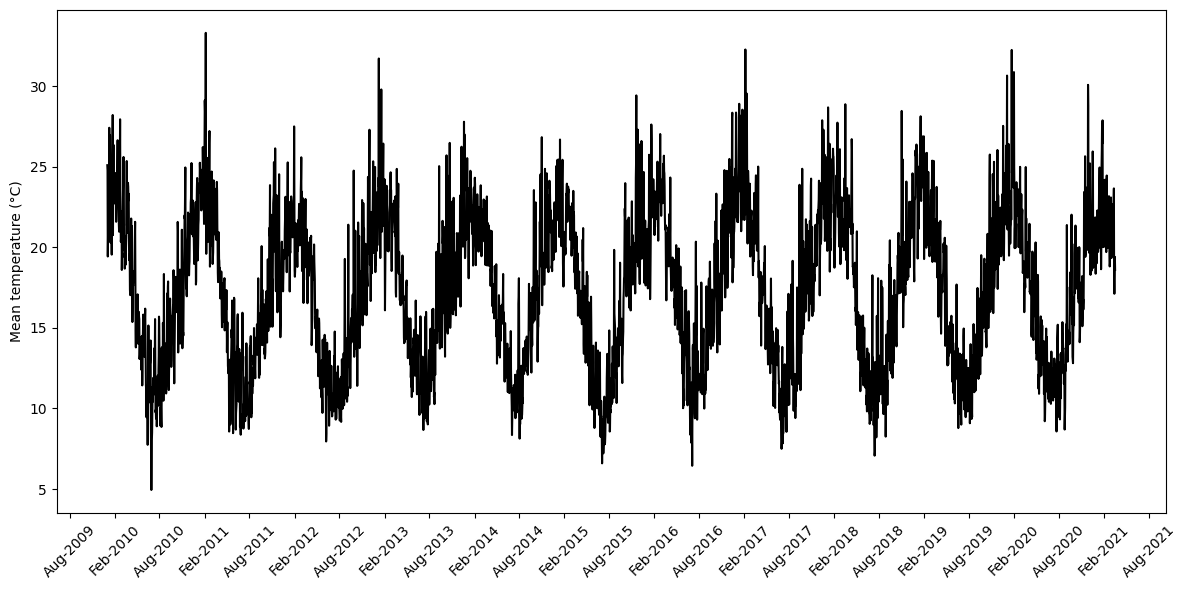

In [74]:
# Transforming half-hourly temperature demand into daily 
temp['DATETIME'] = pd.to_datetime(temp['DATETIME'], dayfirst=True)
temp['DATE'] = temp['DATETIME'].dt.date
daily_temp = temp.groupby(['LOCATION', 'DATE'])['TEMPERATURE'].mean().reset_index()
daily_temp = daily_temp.rename(columns={"TEMPERATURE": "daily_temperature"})
print(daily_temp.head())
print(daily_temp.tail())
print(daily_temp.dtypes)

# Daily mean temperature plot
plt.figure(figsize=(12,6))
plt.plot(daily_temp['DATE'], daily_temp['daily_temperature'], color='black')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=6))  #for every 6 months
plt.ylabel("Mean temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

         DATE  forecast_demand
0  2010-01-01          7748.11
1  2010-01-02          7765.12
2  2010-01-03          7462.38
3  2010-01-04          8467.41
4  2010-01-05          8784.75
            DATE  forecast_demand
4090  2021-03-14          7024.01
4091  2021-03-15          7054.60
4092  2021-03-16          7309.70
4093  2021-03-17          7324.87
4094  2021-03-18          6961.08
DATE                object
forecast_demand    float64
dtype: object


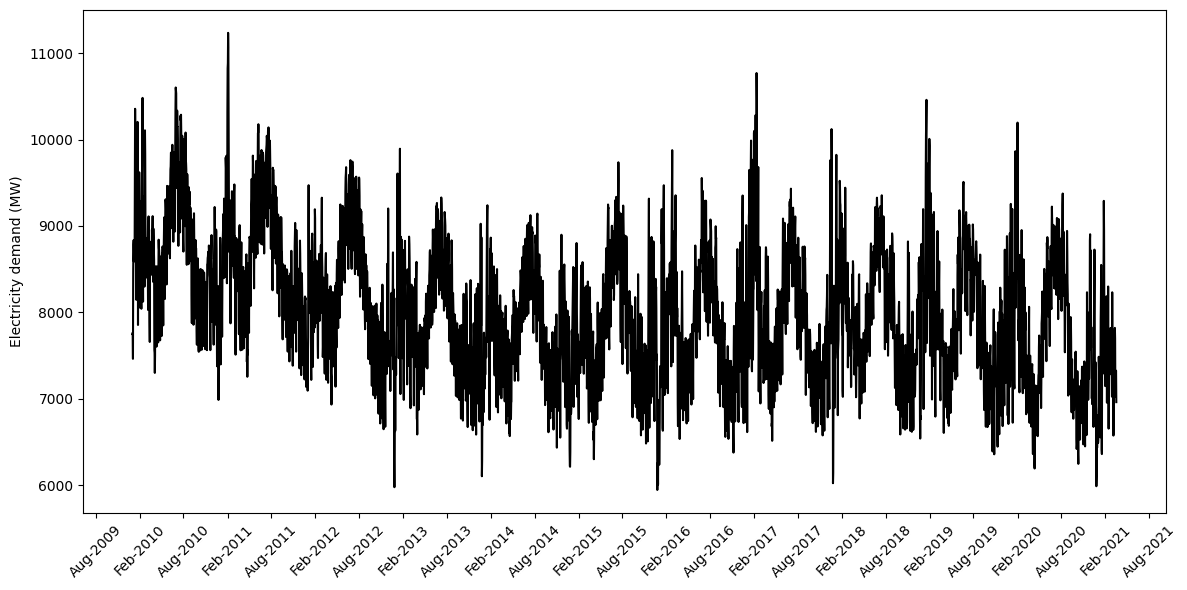

In [75]:
# Transforming 5-min forecasted electricity demand into daily basis
forecast['DATETIME'] = pd.to_datetime(forecast['DATETIME'])
forecast['DATE'] = forecast['DATETIME'].dt.date
daily_forecast = forecast.groupby('DATE')['FORECASTDEMAND'].mean().reset_index().round(2)
daily_forecast = daily_forecast.rename(columns={'FORECASTDEMAND': "forecast_demand"})
print(daily_forecast.head())
print(daily_forecast.tail())
print(daily_forecast.dtypes)

# Daily forecasted electricity demand plot
plt.figure(figsize=(12,6))
plt.plot(daily_forecast['DATE'], daily_forecast['forecast_demand'], color='black')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=6))  #for every 6 months
plt.ylabel("Electricity demand (MW)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##### Now merging variables to compile one dataframe.

In [78]:
# Merge demand and temperature
dat = pd.merge(daily_demand, daily_temp, on='DATE', how='inner')
dat = dat.drop(["LOCATION"],axis=1)

# adding dummay variables based on types of dates/months
dat['DATE'] = pd.to_datetime(dat['DATE'])
dat['day_of_week'] = dat['DATE'].dt.day_name() #day of the week (0=Monday, 6=Sunday)
dat['is_weekend'] = dat['DATE'].dt.dayofweek >= 5  #True for Sat/Sun
dat['is_weekend'] = dat['is_weekend'].astype(int)  #1 = weekend, 0 = weekday
dat['month'] = dat['DATE'].dt.month
dat['is_summer'] = dat['DATE'].dt.month.isin([12, 1, 2]).astype(int) #Summer dummy (Dec, Jan, Feb in NSW)
dat['is_winter'] = dat['DATE'].dt.month.isin([6, 7, 8]).astype(int) #Winter dummy (Jun, Jul, Aug in NSW)

#one-hot encode day_of_week and month for dummy variables
#dat = pd.get_dummies(dat, columns=['day_of_week', 'month'], drop_first=False)
print(dat.head())
print(dat.tail())


        DATE  daily_demand  daily_temperature day_of_week  is_weekend  month  \
0 2010-01-01       7801.35          25.094000      Friday           0      1   
1 2010-01-02       8017.46          24.765385    Saturday           1      1   
2 2010-01-03       7399.90          19.429825      Sunday           1      1   
3 2010-01-04       8241.72          20.625926      Monday           0      1   
4 2010-01-05       8827.81          22.660417     Tuesday           0      1   

   is_summer  is_winter  
0          1          0  
1          1          0  
2          1          0  
3          1          0  
4          1          0  
           DATE  daily_demand  daily_temperature day_of_week  is_weekend  \
4087 2021-03-14       7092.58          18.042254      Sunday           1   
4088 2021-03-15       6930.62          17.116667      Monday           0   
4089 2021-03-16       7330.38          18.264516     Tuesday           0   
4090 2021-03-17       7428.19          19.405263   Wednesda

##### Making some exploratory plots

<Axes: xlabel='day_of_week', ylabel='daily_demand'>

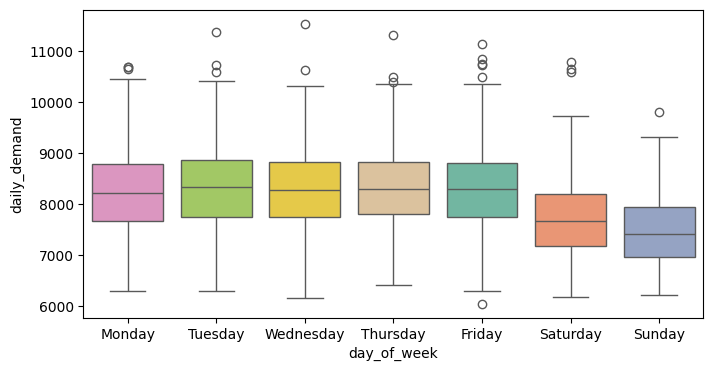

In [79]:
# 1. Demand by day of week
plt.figure(figsize=(8,4))
sns.boxplot(x='day_of_week', y='daily_demand', data=dat, hue='day_of_week',
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
            palette='Set2')
#NOTE: Similar demand of electricty on weekdays but notably lower demand on weekend

Text(0.5, 1.0, '')

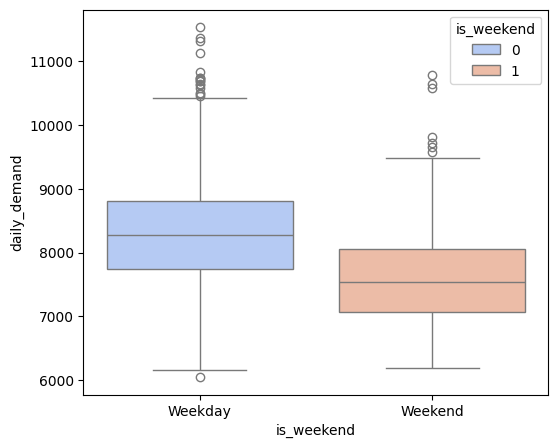

In [59]:
#Daily demand: weekday vs weekend
plt.figure(figsize=(6,5))
sns.boxplot(x='is_weekend', y='daily_demand', hue='is_weekend', data=dat, palette='coolwarm')
plt.xticks([0,1], ["Weekday","Weekend"])
plt.title("")

<Axes: xlabel='month', ylabel='daily_demand'>

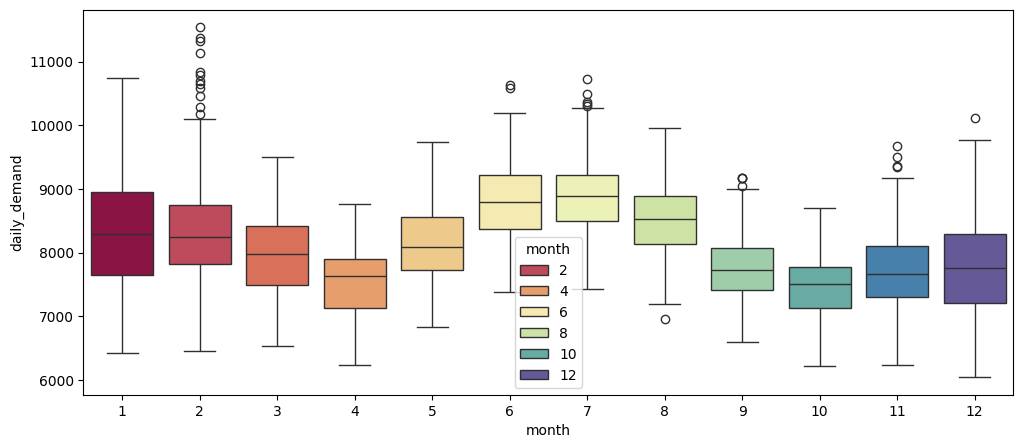

In [80]:
#Electricity demand by month (seasonality)
plt.figure(figsize=(12,5))
sns.boxplot(x='month', y='daily_demand', data=dat, hue='month', palette='Spectral')


<Axes: xlabel='season', ylabel='daily_demand'>

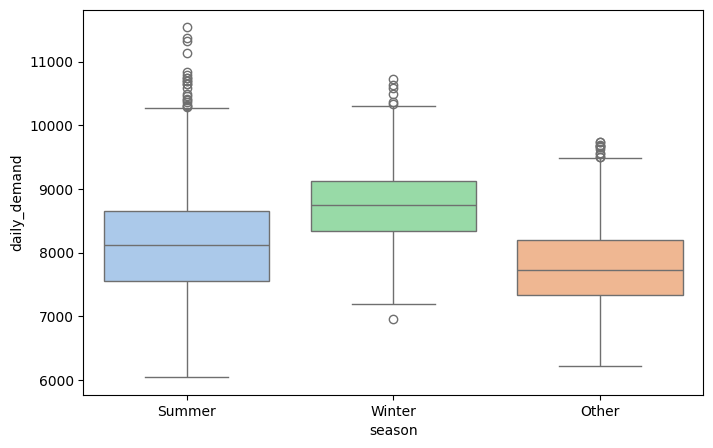

In [81]:
#Seasonal comparison of electricity demand
dat['season'] = "Other"
dat.loc[dat['is_summer']==1, 'season'] = "Summer"
dat.loc[dat['is_winter']==1, 'season'] = "Winter"

plt.figure(figsize=(8,5))
sns.boxplot(x='season', y='daily_demand', hue='season', data=dat, 
            order=['Summer','Winter','Other'], palette='pastel')

Text(0, 0.5, 'Daily Demand (MW)')

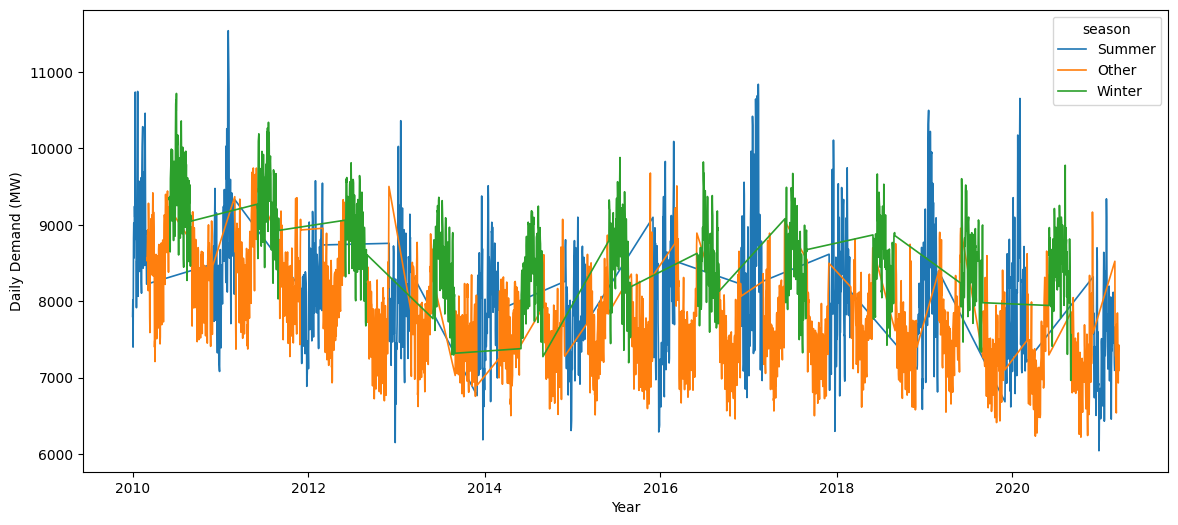

In [82]:
# Electricity demand trend with seasonal trend over time
plt.figure(figsize=(14,6))
sns.lineplot(x='DATE', y='daily_demand', hue='season', data=dat, linewidth=1.2)
plt.xlabel("Year")
plt.ylabel("Daily Demand (MW)")

In [ ]:
dat["daily_temperature"].corr(dat['daily_demand'])
#NOTE: may be some non-linear relationship

np.float64(-0.0991636833409437)

Text(0, 0.5, 'Daily demand (MW)')

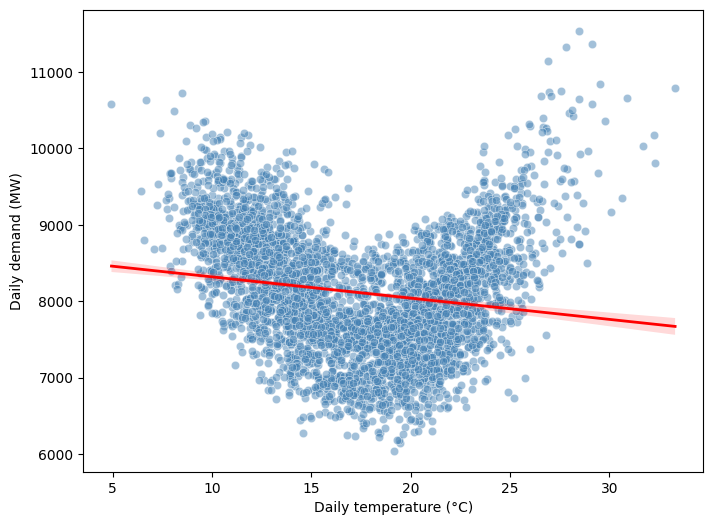

In [ ]:
#scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='daily_temperature', y='daily_demand', data=dat, alpha=0.5, color='steelblue')
sns.regplot(x='daily_temperature', y='daily_demand', data=dat,
            scatter=False, color='red', line_kws={"lw":2})
plt.xlabel("Daily temperature (°C)")
plt.ylabel("Daily demand (MW)")
#NOTE: Linear model is not enough to capture this relationship
# Low demand of electricity with temperature is ~15-20, however, lower/higher than this causes increase in demand